In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\Users\arbaa\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# About Dataset

The dataset that I have picked provides insights into the salaries of employees with various designations and employment attributes from year 2020 to year 2024. It includes information such as salary, job title, experience level, employment type, employee residence, remote work ratio, company location and company size.

# Metadata:

In [2]:
df=pd.read_csv("salaries.csv")

# DATA EXPLORATION AND CLEANING

In [3]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [4]:
df.describe(include='all')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,16534.000000,16533,16531,16534,1.653400e+04,16534,16534.000000,16532,16534.000000,16533,16534
unique,NaN,4,4,155,NaN,23,NaN,88,NaN,77,3
top,NaN,SE,FT,Data Engineer,NaN,USD,NaN,US,NaN,US,M
freq,NaN,10669,16451,3464,NaN,15294,NaN,14466,NaN,14517,15306
mean,2023.226866,NaN,NaN,NaN,1.637270e+05,NaN,149686.777973,NaN,32.003750,NaN,NaN
std,0.713558,NaN,NaN,NaN,3.402057e+05,NaN,68505.293156,NaN,46.245158,NaN,NaN
min,2020.000000,NaN,NaN,NaN,1.400000e+04,NaN,15000.000000,NaN,0.000000,NaN,NaN
25%,2023.000000,NaN,NaN,NaN,1.017630e+05,NaN,101125.000000,NaN,0.000000,NaN,NaN
50%,2023.000000,NaN,NaN,NaN,1.422000e+05,NaN,141300.000000,NaN,0.000000,NaN,NaN
75%,2024.000000,NaN,NaN,NaN,1.872000e+05,NaN,185900.000000,NaN,100.000000,NaN,NaN


In [5]:
df.shape

(16534, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16533 non-null  object
 2   employment_type     16531 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16532 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16533 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [7]:
df.isnull().sum()

work_year             0
experience_level      1
employment_type       3
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    2
remote_ratio          0
company_location      1
company_size          0
dtype: int64

In [8]:
df=df.fillna(method='ffill')

In [9]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [10]:
duplicates=df[df.duplicated()]
num_duplicates=duplicates.shape[0]
num_duplicates

6421

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(10113, 11)

In [13]:
year_counts=df['work_year'].value_counts()
year_counts

2023    4632
2024    4074
2022    1116
2021     216
2020      75
Name: work_year, dtype: int64

In [14]:
workexp_counts=df['experience_level'].value_counts()
workexp_counts

SE    5950
MI    2761
EN    1011
EX     391
Name: experience_level, dtype: int64

SE-Senior Engineer
MI- Mid-Level Engineer
EL- Entry-level Engineer
EX: Executive

In [15]:
worktype_counts=df['employment_type'].value_counts()
worktype_counts

FT    10033
PT       38
CT       28
FL       14
Name: employment_type, dtype: int64

FT- Full time
PT- Part time
CT- Contract
FL- Freelance

In [16]:
companysize_counts=df['company_size'].value_counts()
companysize_counts

M    9284
L     642
S     187
Name: company_size, dtype: int64

In [17]:
jobtitle_counts=df['job_title'].value_counts()
jobtitle_counts

Data Engineer                    1842
Data Scientist                   1835
Data Analyst                     1384
Machine Learning Engineer         945
Analytics Engineer                354
                                 ... 
Quantitative Research Analyst       1
AWS Data Architect                  1
Analytics Engineering Manager       1
Marketing Data Scientist            1
Applied Research Scientist          1
Name: job_title, Length: 155, dtype: int64

In [18]:
#noticed there is also Machine Learning Engineer in the list along with ML engineer which is the same. 
#Hence I am replacing 'Machine Learning Engineer' with 'ML Engineer' for consistency

df['job_title']= df['job_title'].replace({'Machine Learning Engineer': 'ML Engineer'})

In [19]:
remote_counts=df['remote_ratio'].value_counts()
remote_counts

0      6394
100    3472
50      247
Name: remote_ratio, dtype: int64

0-office
50-hybrid
100-remote

In [20]:
#standardizing the values of remote ratio to office (0), hybrid(50) and remote(100)
df['remote_ratio']=df['remote_ratio'].replace({0:'office', 50:'hybrid', 100:'remote'})

In [21]:
df['remote_ratio'].value_counts()

office    6394
remote    3472
hybrid     247
Name: remote_ratio, dtype: int64

In [22]:
companies_location=df['company_location'].value_counts()
companies_location

US    8378
GB     541
CA     404
DE     104
ES      74
      ... 
AM       1
QA       1
AD       1
EC       1
MD       1
Name: company_location, Length: 77, dtype: int64

In [23]:
employees_countries=df['employee_residence'].value_counts()
employees_countries

US    8327
GB     533
CA     402
DE      97
IN      78
      ... 
UG       1
MU       1
QA       1
PE       1
LU       1
Name: employee_residence, Length: 88, dtype: int64

# DATA VISUALIZATION

# 1) Average salary of all employees for each experience level


In [24]:
df_average_salary=df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()
df_average_salary

,experience_level,salary_in_usd
0,EX,195218.519182
1,SE,163331.434958
2,MI,124116.557407
3,EN,91351.461919


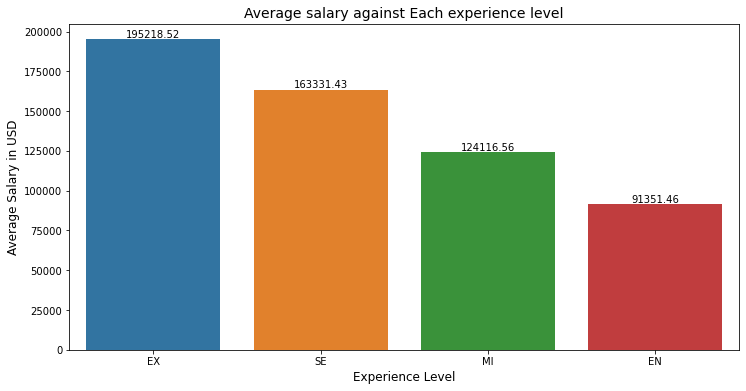

In [25]:
plt.figure(figsize=(12,6))
ax= sns.barplot(data=df_average_salary, x='experience_level',y='salary_in_usd')
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)
plt.title('Average salary against Each experience level', fontsize=14)

# to present labels on each bar in the graph.
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)

plt.show()

We can observe average salary of EX (executive) level is the highest (195K USD approx) when compared to other experience levels category with Entry level being the lowest (91.3K USD)

# 2) How has the average salary changed over the years in USD?

<function matplotlib.pyplot.show(close=None, block=None)>

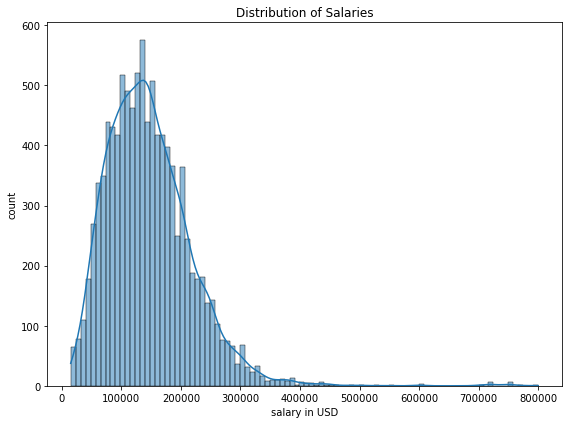

In [26]:
# drawing a Histogram showing the volume distribution of the salary
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='salary_in_usd', kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('salary in USD')
plt.ylabel('count')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

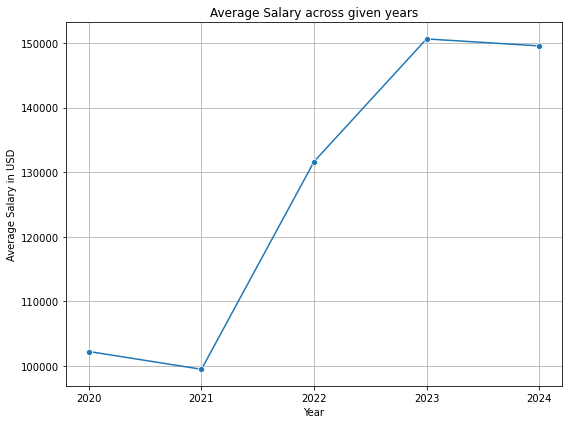

In [27]:
years_unique=sorted(df['work_year'].unique())

#using estimator ='mean' to calculate the avg of salary_in_usd column
plt.figure(figsize=(8,6))
sns.lineplot(data=df, x='work_year', y='salary_in_usd', estimator='mean', marker='o', ci=None, markers=True)
plt.title('Average Salary across given years')
plt.xlabel('Year')
plt.ylabel('Average Salary in USD')
plt.xticks(years_unique)
plt.tight_layout()
plt.grid(True)
plt.show

We can observe there was substancial increase in the average salary overall in terms of all job designations from 2021 to 2023 by 50% and has slightly decreased in 2024.

# 3) How is the average salary varying in terms of employment type? which job title is earning the most?

In [28]:
df_grouped=df.groupby('employment_type')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()
df_grouped

,employment_type,salary_in_usd
0,FT,147131.548789
1,CT,112578.392857
2,PT,83750.157895
3,FL,49220.857143


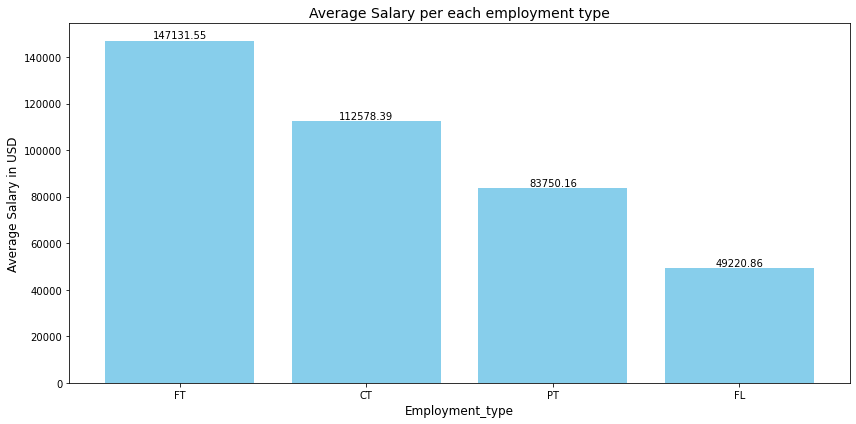

In [29]:
plt.figure(figsize=(12,6))
graph=plt.bar(df_grouped['employment_type'], df_grouped['salary_in_usd'], color='skyblue')
plt.xlabel('Employment_type', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)
plt.title('Average Salary per each employment type', fontsize=14)
plt.tight_layout()

for bar in graph:
    height=bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}',ha='center', va='bottom', fontsize=10)

plt.tight_layout()    
plt.show()

We can clearly conclude that employees working full time are earning the highest salary (around 147K USD) while people who are freelancing are earning the least (49.2K USD)

# 4) How is the average salary related to the size of the company? Which ones have the higher average salary

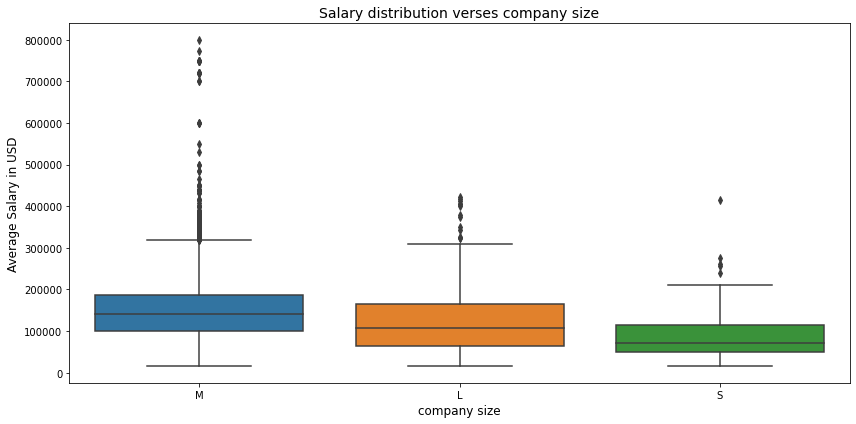

In [30]:
#salary depending on company size

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='company_size', y='salary_in_usd')
plt.xlabel('company size', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)
plt.title('Salary distribution verses company size', fontsize=14)
plt.tight_layout()
plt.show()

We can see that Medium size companies have the avg salary range from 100K to 200K USD(approx) which is higher that the avg salaries offered by Larger size companies. (might be because there are fewer L size companies). Smaller size(S) companies have the least ranging avg salary.

<function matplotlib.pyplot.show(close=None, block=None)>

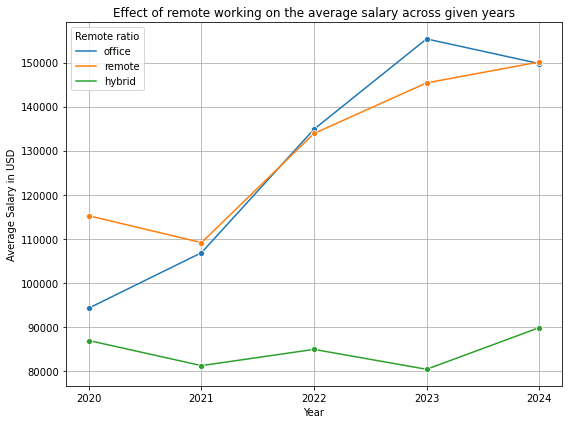

In [31]:
#building to the Question 1 - includiing 'remote ratio' column to drill more into the graph.
years_unique=sorted(df['work_year'].unique())

plt.figure(figsize=(8,6))
sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='remote_ratio',estimator='mean', marker='o', ci=None, markers=True)
plt.title('Effect of remote working on the average salary across given years')
plt.xlabel('Year')
plt.ylabel('Average Salary in USD')
plt.xticks(years_unique)
plt.legend(title='Remote ratio')
plt.tight_layout()
plt.grid(True)
plt.show

# 5) What are the top 10 most prevalent or most frequent job titles among all employees in terms of percentages? 

In [32]:
df_job_title_counts=df['job_title'].value_counts()
df_job_title_counts

Data Engineer                    1842
Data Scientist                   1835
Data Analyst                     1384
ML Engineer                      1117
Analytics Engineer                354
                                 ... 
Quantitative Research Analyst       1
AWS Data Architect                  1
Analytics Engineering Manager       1
Marketing Data Scientist            1
Data Analytics Associate            1
Name: job_title, Length: 154, dtype: int64

In [33]:
total_job_titles=len(df)
total_job_titles

10113

In [34]:
job_title_percentages=(df_job_title_counts/total_job_titles)*100
job_title_percentages

Data Engineer                    18.214180
Data Scientist                   18.144962
Data Analyst                     13.685355
ML Engineer                      11.045189
Analytics Engineer                3.500445
                                   ...    
Quantitative Research Analyst     0.009888
AWS Data Architect                0.009888
Analytics Engineering Manager     0.009888
Marketing Data Scientist          0.009888
Data Analytics Associate          0.009888
Name: job_title, Length: 154, dtype: float64

In [35]:
top_10_job_titles=job_title_percentages.nlargest(10)
top_10_job_titles

Data Engineer                    18.214180
Data Scientist                   18.144962
Data Analyst                     13.685355
ML Engineer                      11.045189
Analytics Engineer                3.500445
Research Scientist                3.164244
Data Architect                    2.798378
Research Engineer                 2.155641
Data Science                      2.036982
Business Intelligence Analyst     1.700781
Name: job_title, dtype: float64

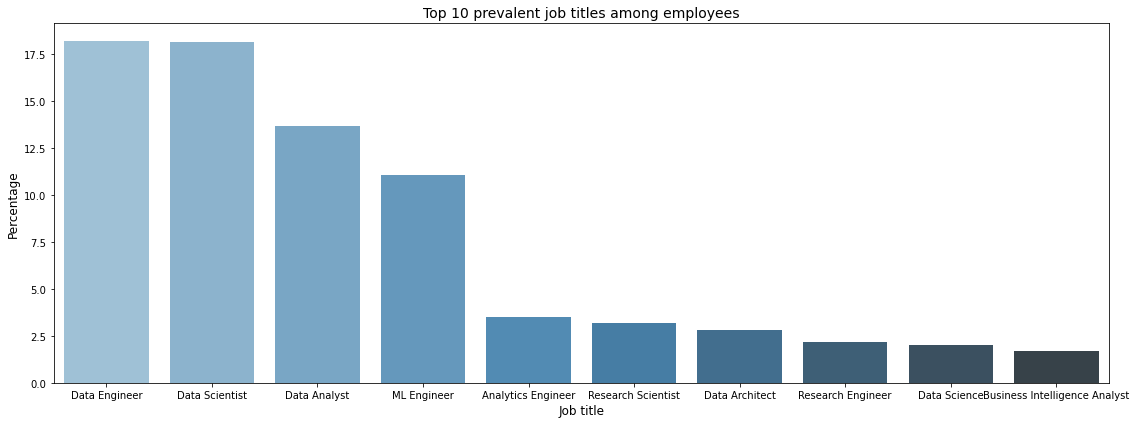

In [36]:
plt.figure(figsize=(16,6))
sns.barplot(x=top_10_job_titles.index, y=top_10_job_titles.values, palette='Blues_d')
plt.xlabel('Job title', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Top 10 prevalent job titles among employees', fontsize=14)
plt.tight_layout()
plt.show()

We can notice that Data Engineer and Data Scientist are the most frequent job titles among all the employees with almost 18% respectively. Data Analyst being the next with 14% and ML Engineer with almost 10%.

# 6) How has the remote working progressed over the years 2020 to 2024? Depict that considering all of the employees

In [37]:
remote_ratio_by_year=df.groupby(['work_year', 'remote_ratio']).size().unstack(fill_value=0)
remote_ratio_percentage=remote_ratio_by_year.apply(lambda x:x /x.sum()*100, axis=1)
remote_ratio_by_year

remote_ratio,hybrid,office,remote
work_year,,,
2020,21,18,36
2021,72,29,115
2022,60,435,621
2023,72,2901,1659
2024,22,3011,1041


<Figure size 1008x576 with 0 Axes>

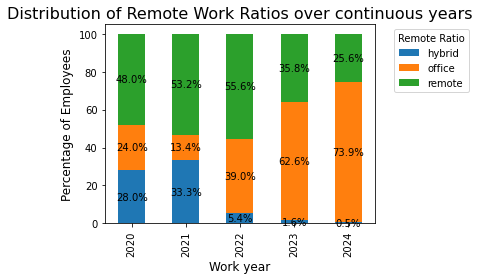

In [38]:
plt.figure(figsize=(14,8))
ax=remote_ratio_percentage.plot(kind='bar', stacked=True)

plt.title('Distribution of Remote Work Ratios over continuous years', fontsize=16)
plt.xlabel('Work year', fontsize=12)
plt.ylabel('Percentage of Employees', fontsize=12)
plt.legend(title='Remote Ratio', bbox_to_anchor=(1.05,1), loc='upper left')

for label in ax.containers:
    ax.bar_label(label, fmt='%.1f%%' , label_type='center')

plt.tight_layout()
plt.show()

We can notice that remote working is decreased from 2020 to 2024 and more employees have started working at the office with 74% of them working in office in the year 2024

# 7) How is the average salary varying across the top 10 employee residences based on the employee count?

In [39]:
employee_count_by_company_residence= df['employee_residence'].value_counts().head(10)
employee_count_by_company_residence

US    8327
GB     533
CA     402
DE      97
IN      78
ES      78
FR      68
AU      50
NL      32
PT      30
Name: employee_residence, dtype: int64

In [40]:
sorted_employee_count=employee_count_by_company_residence.sort_values(ascending=False)
sorted_employee_count

US    8327
GB     533
CA     402
DE      97
IN      78
ES      78
FR      68
AU      50
NL      32
PT      30
Name: employee_residence, dtype: int64

In [41]:
filter_df_top_10_countries=df[df['employee_residence'].isin(sorted_employee_count.index)]

In [42]:
filter_df_top_10_countries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,office,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,office,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,office,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,office,US,M
4,2024,SE,FT,ML Engineer,190000,USD,190000,US,office,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16529,2020,SE,FT,Data Scientist,412000,USD,412000,US,remote,US,L
16530,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,remote,US,L
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,remote,US,S
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,remote,US,L


In [43]:
average_salary_by_top10_residence=filter_df_top_10_countries.groupby('employee_residence')['salary_in_usd'].mean().reset_index()
average_salary_by_top10_residence

,employee_residence,salary_in_usd
0,AU,126885.500000
1,CA,143867.393035
2,DE,99237.113402
3,ES,61863.474359
4,FR,88330.470588
5,GB,96704.215760
6,IN,47289.961538
7,NL,76268.437500
8,PT,53920.966667
9,US,157087.589888


In [44]:
sorted_average_salary_by_top10_residence=average_salary_by_top10_residence.sort_values(by='salary_in_usd',ascending=False)
sorted_average_salary_by_top10_residence


,employee_residence,salary_in_usd
9,US,157087.589888
1,CA,143867.393035
0,AU,126885.500000
2,DE,99237.113402
5,GB,96704.215760
4,FR,88330.470588
7,NL,76268.437500
3,ES,61863.474359
8,PT,53920.966667
6,IN,47289.961538


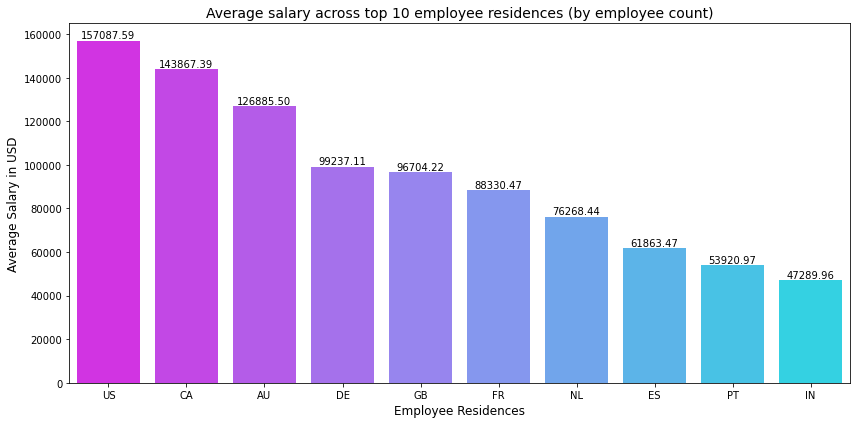

In [45]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x='employee_residence', y='salary_in_usd', data=sorted_average_salary_by_top10_residence, palette='cool_r')
plt.xlabel('Employee Residences', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)
plt.title('Average salary across top 10 employee residences (by employee count)', fontsize=14)

# to present labels on each bar in the graph.
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)
    
plt.tight_layout()
plt.show()

We can see that the average salary is the highest (157K USD) in US area(employee residences) followed by CA (143K USD) and AU (126K USD) and the IN region has comparatively the least average salary (47K USD).

# 8) What are the top 5 highest-paying job titles from 2020 to 2024?

In [46]:
#top 5 highest-paying job titles

top_5_jobs=df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(5).reset_index()
top_5_jobs

,job_title,salary_in_usd
0,Analytics Engineering Manager,399880.000000
1,Data Science Tech Lead,375000.000000
2,Head of Machine Learning,299758.428571
3,Managing Director Data Science,280000.000000
4,AWS Data Architect,258000.000000


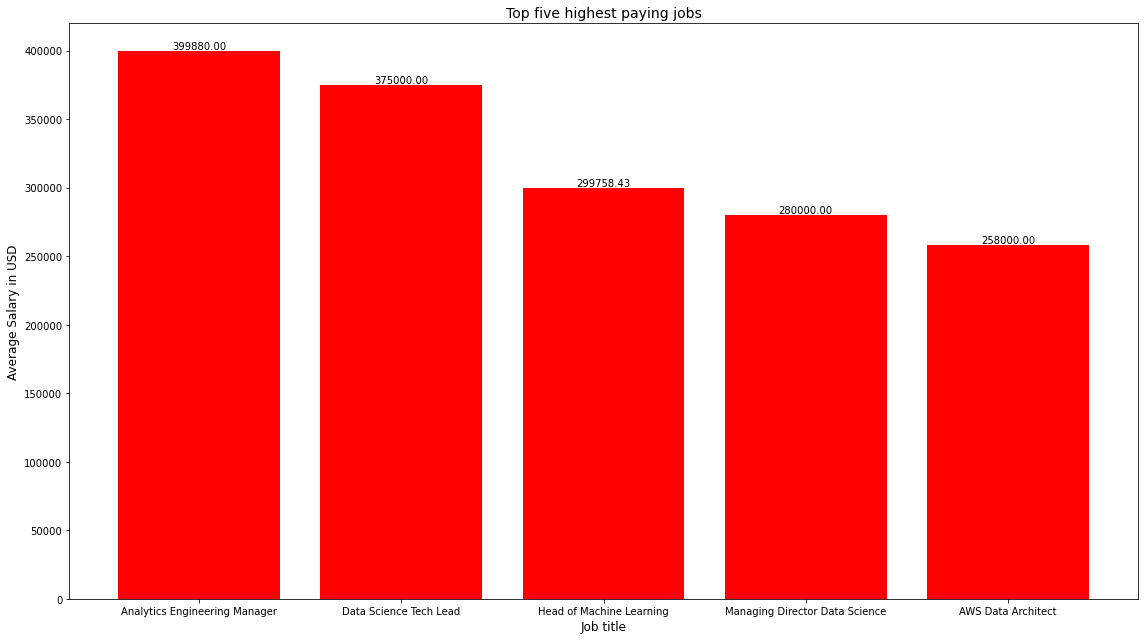

In [47]:
plt.figure(figsize=(16,9))
graph=plt.bar(top_5_jobs['job_title'], top_5_jobs['salary_in_usd'], color='red')
plt.xlabel('Job title', fontsize=12)
plt.ylabel('Average Salary in USD', fontsize=12)
plt.title('Top five highest paying jobs', fontsize=14)

for bar in graph:
    height=bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}',ha='center', va='bottom', fontsize=10)
    
plt.tight_layout()
plt.show()

It is seen that Analytics Engineering Manager has the highest average salary around 400k USD following with Data Science Tech lead, Head of Machine Learning job title, Managing Director Data Science, AWS Data Architect being the top 5